In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import smogn
import torch
from scipy import stats

In [47]:
base_path = os.getcwd()
backend_root = os.path.dirname(base_path)

In [48]:
file_path = os.path.join(base_path, "data/cleaned_merged_seasons.csv")
df = pd.read_csv(file_path)

/var/folders/yv/683h12gj4mdc5txzm0lh6j0h0000gn/T/ipykernel_60220/2559780044.py:2: DtypeWarning: Columns (2,3,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [38]:
for i in df.columns:
    print(f"{i}: {df[i].isna().sum()}")

season_x: 0
name: 0
position: 90496
team_x: 90496
assists: 0
bonus: 0
bps: 0
clean_sheets: 0
creativity: 0
element: 0
fixture: 0
goals_conceded: 0
goals_scored: 0
ict_index: 0
influence: 0
kickoff_time: 0
minutes: 0
opponent_team: 0
opp_team_name: 27614
own_goals: 0
penalties_missed: 0
penalties_saved: 0
red_cards: 0
round: 0
saves: 0
selected: 0
team_a_score: 59
team_h_score: 59
threat: 0
total_points: 0
transfers_balance: 0
transfers_in: 0
transfers_out: 0
value: 0
was_home: 0
yellow_cards: 0
expected_goals: 140308
expected_assists: 140308
expected_goals_conceded: 140308
GW: 0


In [39]:
df_25 = df[df['season_x'] == '2023-24']
for i in df_25.columns:
    print(f"{i}: {df_25[i].isna().sum()}")

season_x: 0
name: 0
position: 0
team_x: 0
assists: 0
bonus: 0
bps: 0
clean_sheets: 0
creativity: 0
element: 0
fixture: 0
goals_conceded: 0
goals_scored: 0
ict_index: 0
influence: 0
kickoff_time: 0
minutes: 0
opponent_team: 0
opp_team_name: 0
own_goals: 0
penalties_missed: 0
penalties_saved: 0
red_cards: 0
round: 0
saves: 0
selected: 0
team_a_score: 0
team_h_score: 0
threat: 0
total_points: 0
transfers_balance: 0
transfers_in: 0
transfers_out: 0
value: 0
was_home: 0
yellow_cards: 0
expected_goals: 0
expected_assists: 0
expected_goals_conceded: 0
GW: 0


In [45]:
df_25['element'].value_counts()

element
508    39
393    39
21     39
66     38
652    38
       ..
861     3
866     1
865     1
863     1
864     1
Name: count, Length: 865, dtype: int64

In [40]:
for season in sorted(df['season_x'].unique()):
    season_mask = df['season_x'] == season
    n_total = season_mask.sum()
    n_nans = df.loc[season_mask, 'position'].isna().sum()
    percent_nans = (n_nans / n_total) * 100 if n_total > 0 else 0
    print(f"{season}: {percent_nans:.2f}% NaN values in position column")

2016-17: 100.00% NaN values in position column
2017-18: 100.00% NaN values in position column
2018-19: 100.00% NaN values in position column
2019-20: 100.00% NaN values in position column
2020-21: 0.00% NaN values in position column
2021-22: 0.00% NaN values in position column
2022-23: 0.00% NaN values in position column
2023-24: 0.00% NaN values in position column
2024-25: 0.00% NaN values in position column


In [41]:
df = df[df['season_x'].isin(['2024-25', '2023-24', '2022-23'])].copy()

In [15]:
df = df[df['minutes'] > 0].copy()

In [16]:
df.loc[df['total_points'] < 0, 'total_points'] = 0

In [71]:
_, target = torch.load("/Users/bragehs/Documents/FPL_forecast/backend/predictor/final_data/train_sequences.pt")

/var/folders/yv/683h12gj4mdc5txzm0lh6j0h0000gn/T/ipykernel_60220/757508606.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _, target = torch.load("/Users/bragehs/Documen

In [72]:
target.shape

torch.Size([32472, 1])

In [73]:
target = target.squeeze(1)

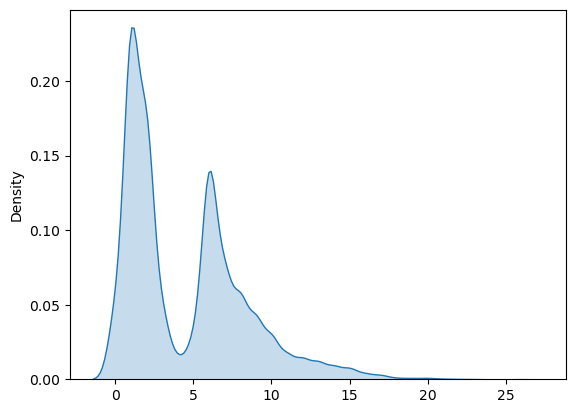

In [74]:
sns.kdeplot(target, fill=True)
plt.show()

In [75]:
target_log = np.log1p(target)
#np.expm1 is used to reverse the log1p transformation

/var/folders/yv/683h12gj4mdc5txzm0lh6j0h0000gn/T/ipykernel_60220/216777872.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  target_log = np.log1p(target)


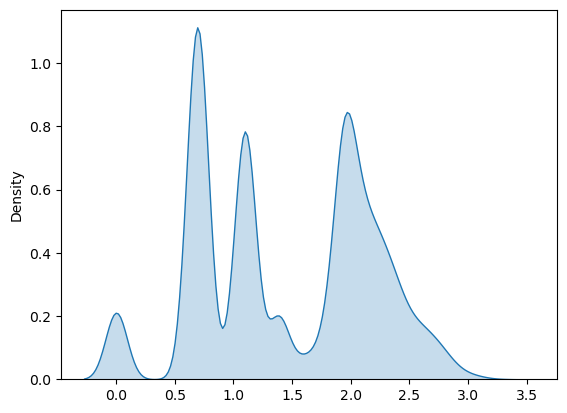

In [77]:
sns.kdeplot(target_log, fill=True)
plt.show()

In [70]:
original_outliers = target[target > target.quantile(0.95)]
log_outliers = target_log[target > target.quantile(0.95)]

print("Original outliers range:", original_outliers.min(), "to", original_outliers.max())
print("Log-transformed outliers range:", log_outliers.min(), "to", log_outliers.max())

Original outliers range: tensor(10.) to tensor(26.)
Log-transformed outliers range: tensor(2.3979) to tensor(3.2958)
